# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Чиркова Юлия

### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

спасибо ассистенту за то, что это будет читаться🥹🙏🏼

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [73]:
data = pd.read_csv('test_1_1.csv', delimiter=';')
data.head()
dt = data['metrics']

In [74]:
k5 = np.percentile(dt, 5)
k5

1.0

посчитала значение 5-го перцентиля

In [75]:
k95 = np.percentile(dt, 95)
k95

52.0

значение 95 перцентиля

In [76]:
c1 = dt[dt != k5].count() / dt.count() * 100
c1

56.9673346608482

процентное кол-во значений в выборке, которые не равны значению пятипроцентного перцентиля

In [77]:
c1_1 = dt[dt < k5].count() / dt.count() * 100
c1_1

0.0

процентное кол-во значений, которые строго меньше пятипроцентного перцентиля (заметим, что их нет, а значит 1 - минимум в выборке)

In [78]:
c2 = dt[dt != k95].count() / dt.count() * 100
c2

99.85497280332683

Процентное количество значений в выборке, которое не равно значению 95-процентного перцентиля

In [79]:
c3 = dt[dt > k95].count() / dt.count() * 100
c3

4.987306046493438

Процентное количество значений в выборке, которое строго больше значения 95-процентного перцентиля

In [80]:
import scipy.stats as st
from numpy import random

Построим гисторграмму нашей выборки и если выборка из непрерывных случайных величин, то сделаем предположение, что она из хи-квадрат или логарифмического нормального распределения и проверим, построив их на том же графике

<AxesSubplot:title={'center':'Распределение значений метрики'}, xlabel='metrics', ylabel='Count'>

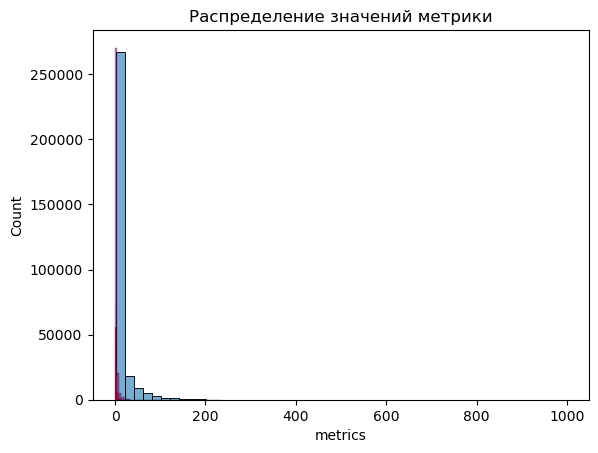

In [81]:
ch = st.chi2.rvs(df=2, size=300000)
ln = st.lognorm.rvs(1.2, size = 300000)
sns.histplot(dt, bins = 50, alpha=0.6).set(title='Распределение значений метрики')
sns.histplot(ch, bins=50, color='red', alpha = 1)
sns.histplot(ln, bins=50, color='purple', alpha = 0.5)

<AxesSubplot:ylabel='Count'>

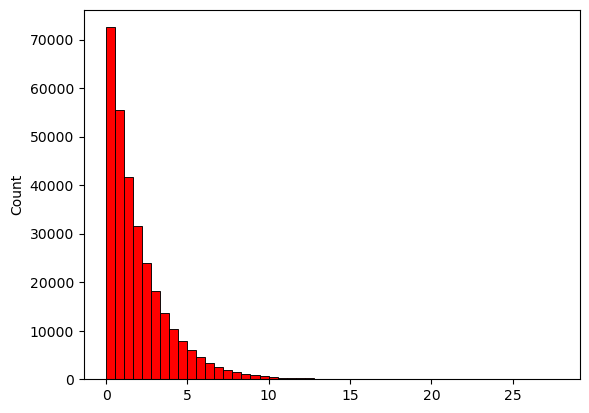

In [82]:
sns.histplot(ch, bins=50, color='red', alpha = 1)

<AxesSubplot:ylabel='Count'>

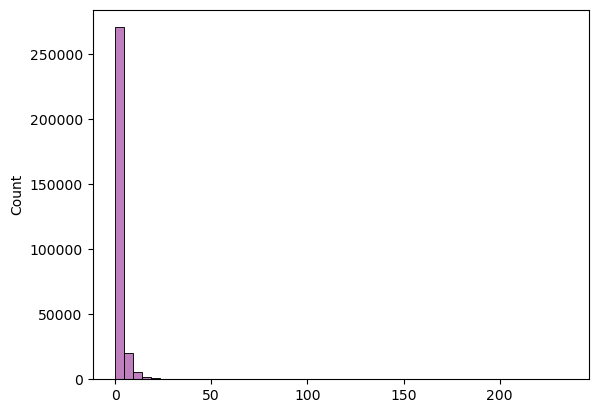

In [83]:
sns.histplot(ln, bins=50, color='purple', alpha = 0.5)

Если величины непрерывны, то скорее удовлетворяют хи-квадрат распределению с двумя степенями свободы.

<AxesSubplot:ylabel='Count'>

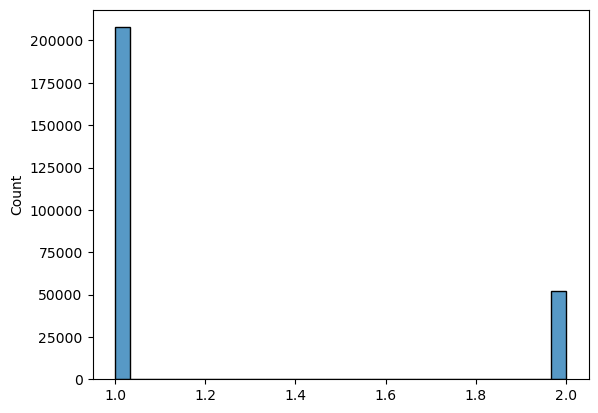

In [84]:
zp = st.zipfian.rvs(2, 2, size=260000)
sns.histplot(zp, bins=30)

Поскольку данные являютя натуральными числами, можно сделать предположение, что они дискретны. Наиболее подходящим выглядит распределение, подчиняющееся закону Зипфа, проверим соотествие ему с помощью критерия Колмогорова-Смирнова (лучше не перезапускать, работает очень медленно, тк огромный размер выборки( )

In [85]:
zp = st.zipfian.rvs(2, 200, size=350000)
st.kstest(dt, zp)

KstestResult(statistic=0.20664480135464247, pvalue=0.0)

In [86]:
st_5_perc = np.sqrt((-0.5*np.log((1-0.05)/2)))
st_5_perc

0.6100985473460397

Значение статистики, полученной в рез-те теста меньше, чем для 5% уровня важности, а значит наше распределение может удовлетворять закону Зипфа

### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [118]:
data = pd.read_csv('test_1_2.csv', delimiter=';')
data.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,B,1
2,3,A,4
3,4,B,37
4,5,B,4


In [129]:
df_a=data[data.variant=='A'].metrics
df_a.head()

0      1
2      4
7     15
9      1
11    10
Name: metrics, dtype: int64

In [130]:
df_b=data[data.variant=='B'].metrics
df_b.head()

1     1
3    37
4     4
5     1
6     3
Name: metrics, dtype: int64

In [131]:
from scipy.stats import levene

In [132]:
levene(df_a, df_b)

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

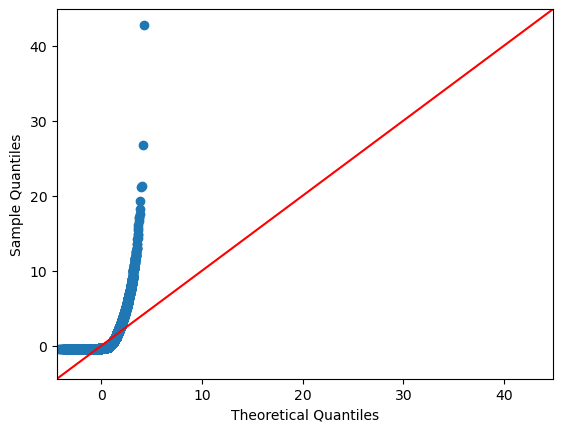

In [133]:
from statsmodels.api import qqplot
fig = qqplot(df_a, line='45', fit=True)

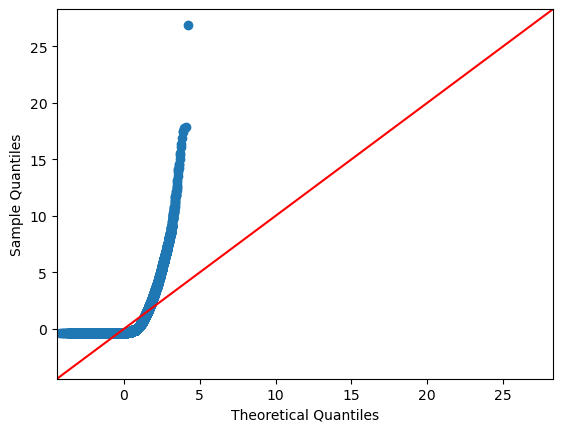

In [134]:
fig = qqplot(df_b, line='45', fit=True)

<AxesSubplot:title={'center':'Распределение значений метрики'}, xlabel='metrics', ylabel='Count'>

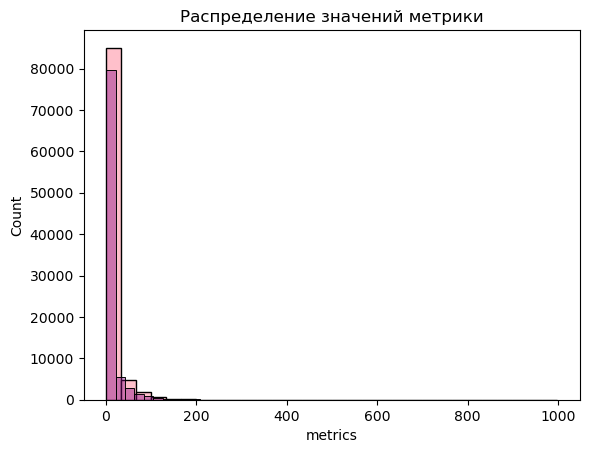

In [135]:
sns.histplot(df_a, bins = 30, alpha=1, color='pink').set(title='Распределение значений метрики')
sns.histplot(df_b, bins = 30, alpha=0.4, color='purple')

Данные выборки нельзя сравнивать по t-критерию Стюдента, поскольку они распределены не нормально, однако если мы сравниваем средние двух выборок, то согласно Центральной предельной теореме, нам не важно, как распределены выборки, поскольку их среднее будет нормально распределено.

In [136]:
ma=df_a.mean()
mb=df_b.mean()
(ma, mb)

(10.099561961892842, 10.33313665071352)

In [137]:
st.ttest_ind(df_a, df_b)

Ttest_indResult(statistic=-2.179573994371754, pvalue=0.02929031635720896)

In [138]:
st.ttest_ind(df_a, df_b, equal_var = False)

Ttest_indResult(statistic=-2.1797359369290046, pvalue=0.0292783030047425)

pvalue получилось примерно 3% и значение статистики довольно сильно уходит влево, а значит различия являются довольно сильными

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [97]:
data = pd.read_csv('hw2_test_1_3.csv', delimiter=';')
data.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,A,4
2,3,A,15
3,4,A,1
4,5,A,10


In [98]:
df_a=data[data.variant=='A'].metrics
df_a.head()

0     1
1     4
2    15
3     1
4    10
Name: metrics, dtype: int64

In [99]:
df_b=data[data.variant=='D'].metrics
df_b.head()

8     2
13    1
14    1
25    1
43    1
Name: metrics, dtype: int64

In [100]:
(df_a.shape[0], df_b.shape[0])

(92686, 15413)

In [101]:
df_a.mean(), df_b.mean()

(10.099561961892842, 9.942386297281516)

<AxesSubplot:title={'center':'Распределение значений метрики'}, xlabel='metrics', ylabel='Count'>

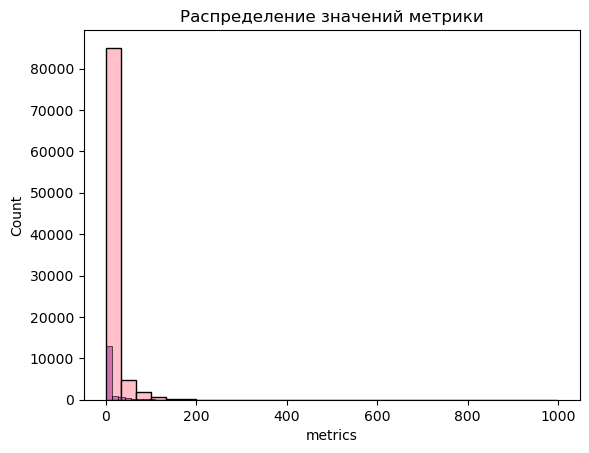

In [102]:
sns.histplot(df_a, bins = 30, alpha=1, color='pink').set(title='Распределение значений метрики')
sns.histplot(df_b, bins = 30, alpha=0.4, color='purple')

Размер выборки B (в нашем файле - D) примерно в 6 раз меньше, чем у A, а поэтому (в том числе смотря на гистрограмму), их лучше привести к одному размеру для проведения тестирования. Распределены они примерно одинаково, однако среднее по выбоке B < среднего по выборке A, но такое может возникать из-за разных размеров выборок.

In [104]:
import random
x_a = df_a.sample(15413)
x_a.head()

97201    17
58434     1
61950     2
46880     3
55710    55
Name: metrics, dtype: int64

Проведем t-test, поскольку есть центральная предельная теорема и размер выборок большой, а используем одинаковую выборку, поскольку есть центральная предельная теорема, у меня все🫡🫡🫡🫡🫡

In [105]:
st.ttest_ind(x_a, df_b)

Ttest_indResult(statistic=0.999022246128258, pvalue=0.3177917571456796)

есть еще штука как t-критерий Уэлча, его можно и не при однородных использовать, проведу его🧚🏽‍♀️

In [106]:
st.ttest_ind(df_a, df_b, equal_var = False)

Ttest_indResult(statistic=0.8214166354016996, pvalue=0.41141805919367513)

В обоих вариантах нулевая гипотеза не отвергается, а значит a/b тест показал, что может изменения и не критичны

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [140]:
data4 = pd.read_csv('test_1_1.csv', delimiter=';')
data4.head()
dt4 = data['metrics']

In [141]:
mn = dt4.mean()
d = dt4.var()
mn, d

(10.215608781568262, 528.8576238267192)

Среднеее значение намного меньше разброса (дисперсии), однако критичность и величину "большевизны" дисперсии стоит рассматривать относительно конкретной задачи. Минимизация дисперсии необходима, чтобы выделить явно ээфекты и не смешать их с разбросом в распределении, но если задача поставлена так, что какие-то критические значения являются важными, что стоит подходить к задаче вообще с иной точки зрения.

Возможно с учетом того, что тут данные совпадают с первым номером - был намек на метод максимального правдоподобия и  надо сравнить оценку дисперсии с реальностью, но это останется догадкой🤕 Еще одна группа, можно было поделить на подгруппы, но я сделала легче

In [143]:
data_new  = np.log(dt4)
data_new.mean(), data_new.std()

(1.1544749439864834, 1.3506337423339154)

[Text(0.5, 1.0, 'Распределение значений метрики')]

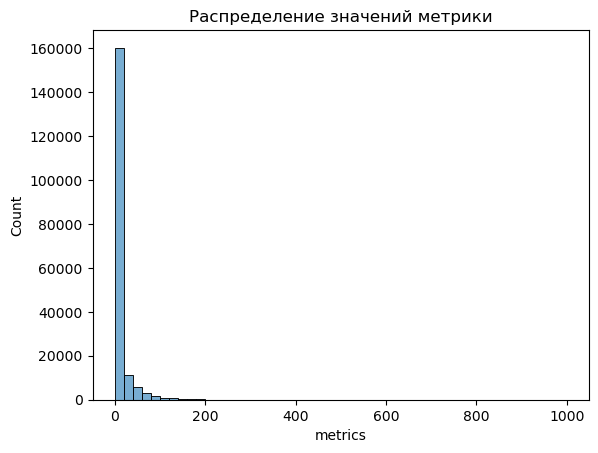

In [144]:
sns.histplot(dt4, bins = 50, alpha=0.6).set(title='Распределение значений метрики')

[Text(0.5, 1.0, 'Распределение значений метрики')]

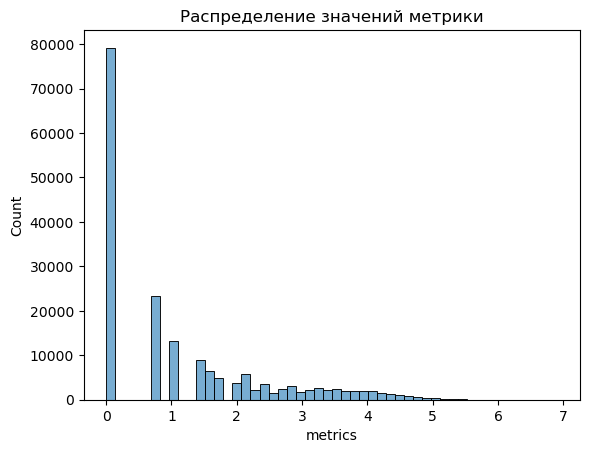

In [145]:
sns.histplot(data_new, bins = 50, alpha=0.6).set(title='Распределение значений метрики')

прологарифмировали и дисперсия уменьшилась, поскольку логарифмирование позволяет снизить влияние экстремальных и выходящих сильно за рамки распределения значений 

круто ставлю класс🤡 ( клоун это я)

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [148]:
data = pd.read_csv('task5.csv')
data.head()

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1


In [149]:
data.id.nunique()

8191

In [150]:
df_a = data[data.variant == 'A']
df_a.head()

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1


In [151]:
df_b = data[data.variant == 'B']
df_b.head()

,id,variant,view,action
4646,7612067,B,1,1
4647,6919535,B,8,5
4648,7833635,B,1,1
4649,7597555,B,1,1
4650,7594297,B,1,1


In [152]:
asize = df_a.shape[0]
bsize = df_b.shape[0]
(df_a.shape[0], df_b.shape[0], data.shape[0])

(4646, 3545, 8191)

action -- кол-во кликов на опредеоенную кнопку

In [157]:
data['metrics'] = data.action / data.view
data.head()

,id,variant,view,action,metrics
0,88258,A,10,2,0.200000
1,109938,A,3,1,0.333333
2,117644,A,7,5,0.714286
3,374080,A,9,9,1.000000
4,662082,A,1,1,1.000000


метрика и есть значение ctr  по сути я разделила кол-во кликов на кнопке на сайте на кол-во просмотров этого сайта

In [158]:
dta = data[data['variant'] == 'A']['metrics']
dta.head()

0    0.200000
1    0.333333
2    0.714286
3    1.000000
4    1.000000
Name: metrics, dtype: float64

In [159]:
dtb = data[data['variant'] == 'B']['metrics']
dtb.head()

4646    1.000
4647    0.625
4648    1.000
4649    1.000
4650    1.000
Name: metrics, dtype: float64

In [ ]:
sns.histplot(dta, bins = 30, alpha=1, color='pink').set(title='Распределение значений метрики')


<AxesSubplot:title={'center':'Распределение значений метрики'}, xlabel='metrics', ylabel='Count'>

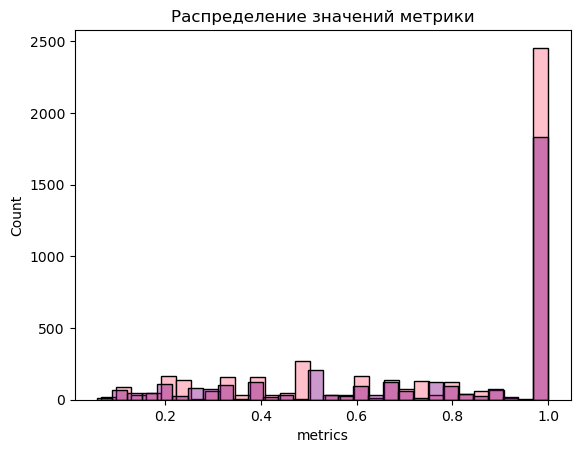

In [146]:
sns.histplot(dta, bins = 30, alpha=1, color='pink').set(title='Распределение значений метрики')
sns.histplot(dtb, bins = 30, alpha=0.4, color='purple')

<AxesSubplot:xlabel='metrics', ylabel='Count'>

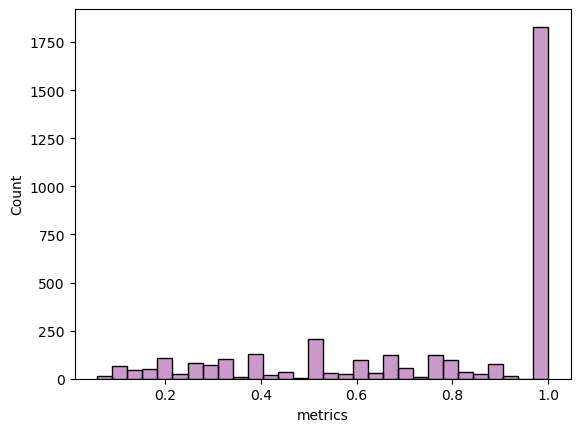

In [58]:
sns.histplot(dtb, bins = 30, alpha=0.4, color='purple')

Еще проведу t-test)

In [168]:
st.ttest_ind(dta, dtb, equal_var = False)

Ttest_indResult(statistic=0.7607957086481347, pvalue=0.44680268552920255)

 эффекта нет, pvalue большое и мы не можем отклонить нулевую гипотезу🧘🏼‍♀️

Проведем z-test, потому что снова цпт и потому что можно

In [60]:
mean_a = dta.mean()
mean_b = dtb.mean()
mean_a, mean_b

(0.7615838991498777, 0.7564976441639704)

In [63]:
allstd = data.metrics.std()
a_std = dta.std()
b_std = dtb.std()
allstd, a_std, b_std

(0.2995411462352895, 0.2987885323198081, 0.30054241878601384)

In [161]:
means = mean_a - mean_b
error = np.sqrt((allstd / np.sqrt(asize)) ** 2 + (allstd / np.sqrt(bsize)) ** 2)
means, error

(0.0050862549859073125, 0.006680011771972065)

In [164]:
z = means / error
quant = st.norm.cdf(z)
z, quant

(0.7614140752338456, 0.7767951084714899)

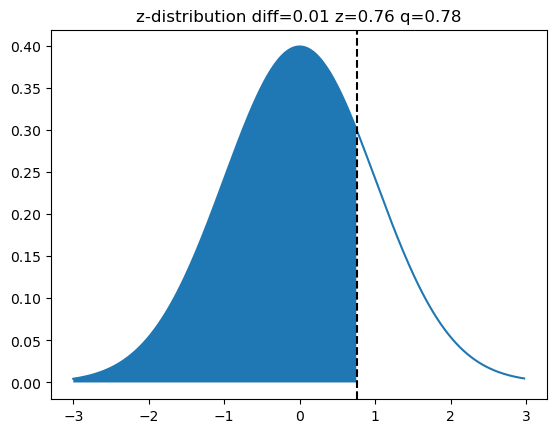

In [165]:
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('z-distribution diff=%.2f z=%.2f q=%.2f' % (means, z, quant));

Нулевая гипотеза не отвергается при пятипроцентном уровне значимости и эффект не значителен

всем спасибо, спокойной ночи🐣